In [187]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
weatherData = pd.read_csv("data/weatherAUS.csv")

In [193]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              145460 non-null  datetime64[ns]
 1   Location          145460 non-null  object        
 2   MinTemp           143975 non-null  float64       
 3   MaxTemp           144199 non-null  float64       
 4   Rainfall          142199 non-null  float64       
 5   Evaporation       82670 non-null   float64       
 6   Sunshine          75625 non-null   float64       
 7   WindGustDir       135134 non-null  object        
 8   WindGustSpeed     135197 non-null  float64       
 9   WindDir9am        134894 non-null  object        
 10  WindDir3pm        141232 non-null  object        
 11  WindSpeed9am      143693 non-null  float64       
 12  WindSpeed3pm      142398 non-null  float64       
 13  Humidity9am       142806 non-null  float64       
 14  Humi

In [190]:
weatherData["Date"] = pd.to_datetime(weatherData["Date"])


In [191]:
def convertToBool(value):
    if value == "No":
        return False
    return True;

weatherData["RainTodayBool"] = weatherData["RainToday"].map(convertToBool)
weatherData["RainTomorrowBool"] = weatherData["RainTomorrow"].map(convertToBool)
weatherData.drop("RainToday",inplace=True, axis=1)
weatherData.drop("RainTomorrow",inplace=True, axis=1)

In [192]:
weatherData.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTodayBool,RainTomorrowBool
105197,2016-06-26,Nuriootpa,5.7,11.3,0.0,1.4,1.1,WNW,37.0,N,...,73.0,74.0,1018.9,1016.1,7.0,NaN,8.4,9.4,False,True
87346,2009-04-26,Cairns,18.8,31.4,0.0,6.2,10.6,SE,26.0,SE,...,65.0,54.0,1013.6,1010.0,2.0,3.0,25.1,29.7,False,False
98419,2014-06-28,Adelaide,8.1,13.1,24.4,NaN,NaN,WSW,59.0,WSW,...,64.0,58.0,1003.6,1005.7,NaN,NaN,10.6,11.7,True,True
129818,2017-06-06,Walpole,11.4,20.5,0.0,NaN,NaN,N,48.0,N,...,52.0,43.0,1021.1,1017.8,NaN,NaN,16.7,19.9,False,True
22939,2014-03-25,NorfolkIsland,16.3,23.5,0.0,4.0,11.1,SE,35.0,ESE,...,69.0,63.0,1021.9,1020.8,2.0,1.0,21.4,22.7,False,False
74733,2016-10-22,Nhil,2.6,14.4,15.6,NaN,NaN,SSW,56.0,SSW,...,74.0,51.0,1023.4,1024.1,NaN,NaN,8.0,13.1,True,False
48541,2016-03-01,Canberra,14.3,31.3,0.0,NaN,NaN,NW,31.0,ESE,...,76.0,34.0,1021.7,1018.0,5.0,2.0,18.9,28.9,False,False
100294,2011-01-21,MountGambier,16.4,22.4,0.0,8.8,9.8,SSE,48.0,S,...,83.0,58.0,1011.3,1013.6,8.0,3.0,17.6,21.2,False,False
8440,2015-10-17,Cobar,19.6,36.8,0.0,11.0,NaN,S,44.0,NNW,...,21.0,10.0,1021.9,1019.3,1.0,2.0,28.3,35.5,False,False
110411,2014-03-14,Albany,14.7,19.8,1.6,2.8,6.9,NaN,NaN,WSW,...,62.0,57.0,1017.4,1017.5,7.0,4.0,17.7,18.4,True,False


In [105]:
dataFrom2016 = weatherData.loc[(weatherData['Date'] > "2016-01-01") & (weatherData['Date'] <= "2016-12-31")]

In [106]:
dataFrom2016

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2499,2016-01-02,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,...,54.0,30.0,1011.1,1008.4,8.0,8.0,24.8,31.7,No,Yes
2500,2016-01-03,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,...,62.0,67.0,1014.0,1014.8,8.0,8.0,21.8,19.5,Yes,Yes
2501,2016-01-04,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,...,74.0,65.0,1017.9,1016.5,8.0,8.0,19.2,21.6,Yes,Yes
2502,2016-01-05,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,...,92.0,63.0,1016.3,1013.9,8.0,8.0,17.2,22.2,Yes,No
2503,2016-01-06,Albury,17.0,28.1,0.2,NaN,NaN,SE,39.0,SSE,...,76.0,52.0,1014.6,1012.6,8.0,8.0,20.3,25.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145279,2016-12-27,Uluru,22.1,35.8,63.8,NaN,NaN,WNW,43.0,WNW,...,77.0,41.0,997.8,995.2,4.0,2.0,26.0,33.5,Yes,No
145280,2016-12-28,Uluru,22.6,36.8,0.0,NaN,NaN,NW,50.0,NW,...,63.0,39.0,1000.0,998.8,NaN,NaN,29.7,34.0,No,No
145281,2016-12-29,Uluru,23.2,38.0,0.0,NaN,NaN,SSW,33.0,S,...,25.0,14.0,1004.4,1001.0,NaN,NaN,28.7,36.4,No,No
145282,2016-12-30,Uluru,19.7,37.0,0.0,NaN,NaN,E,37.0,ESE,...,30.0,23.0,1004.6,1000.9,NaN,NaN,28.2,35.1,No,No


<AxesSubplot:xlabel='Date', ylabel='MaxTemp'>

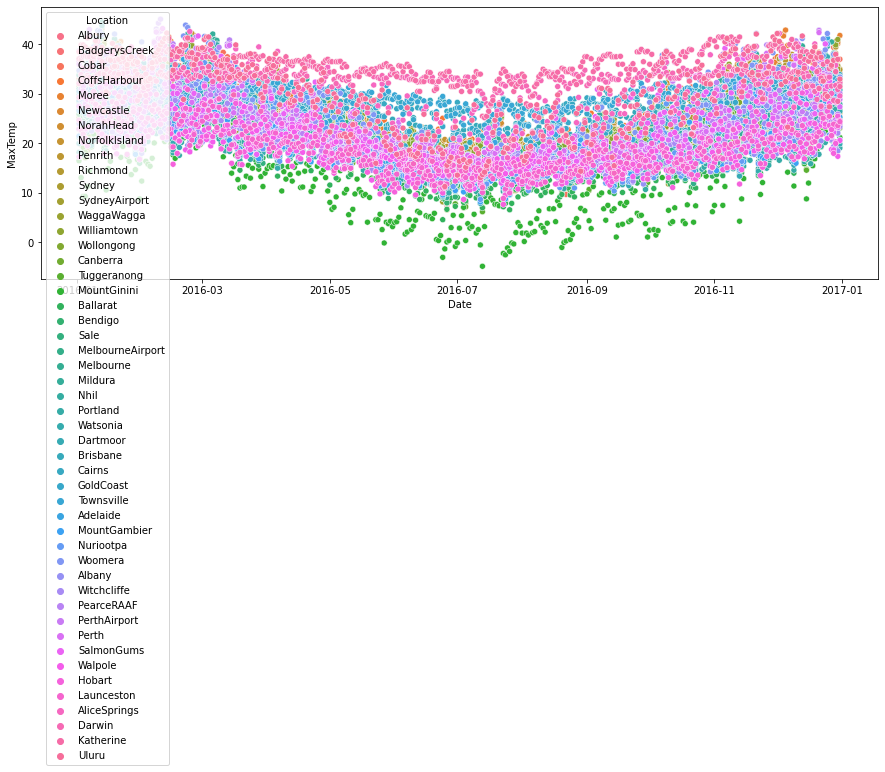

In [117]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = dataFrom2016,y="MaxTemp", x='Date', hue='Location')

<AxesSubplot:xlabel='Date'>

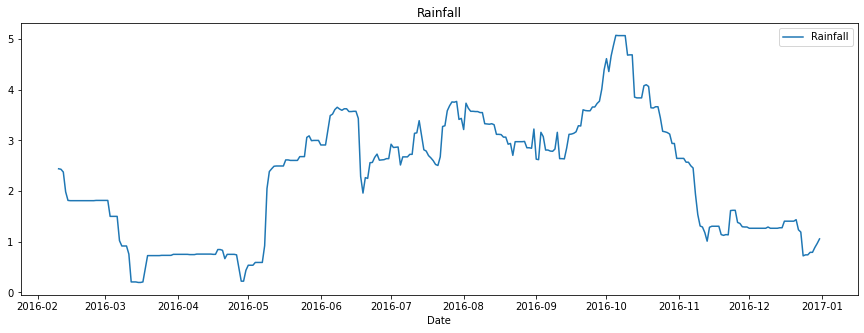

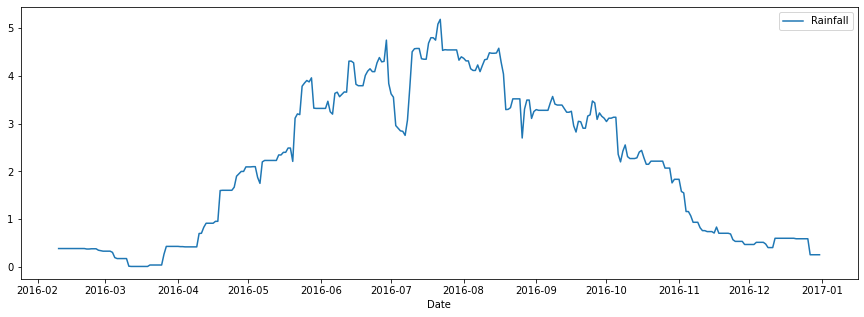

In [161]:
albury2016 = dataFrom2016.loc[dataFrom2016["Location"]=="Albury"];
rainfall = albury2016[["Date", "Rainfall"]]
rainfall.set_index('Date',inplace=True)
plt.figure(figsize=(15,5))
plt.title("Rainfall")
sns.lineplot(data = rainfall.rolling(window=40).mean() , dashes=False)

Perth = dataFrom2016.loc[dataFrom2016["Location"]=="Perth"];
rainfall = Perth[["Date", "Rainfall"]]
rainfall.set_index('Date',inplace=True)
plt.figure(figsize=(15,5))
sns.lineplot(data = rainfall.rolling(window=40).mean() , dashes=False)
